# Specialist Certificate in Data Analytics Essentials Assignment

## Chapter 3: Exploratory Data Analysis

## Imports

In [1]:
%cd ..

/home/michael/Documents/python_projects/UCDPA_Michael_Sandilands


In [2]:
import pandas as pd
import numpy as np
from plotnine import (ggplot, aes, labs, 
                      geom_boxplot, theme, element_text,
                      geom_hline)
from plotnine.scales import scale_fill_discrete
from my_python_extensions.msand import theme_msand
from my_python_extensions.my_visualizations import plot_numeric_variable_distribution

## Import Data

In [3]:
invoice_lines_df = pd.read_csv('./00_Data/invoice_lines.csv')
invoice_lines_df.head()

,InvoiceLineId,InvoiceId,CustomerId,UnitPrice,Quantity,TrackName,Composer,Milliseconds,Bytes,GenreName,AlbumTitle,ArtistName
0,1,1,2,0.99,1,Balls to the Wall,NaN,342562,5510424,Rock,Balls to the Wall,Accept
1,2,1,2,0.99,1,Restless and Wild,"F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. D...",252051,4331779,Rock,Restless and Wild,Accept
2,3,2,4,0.99,1,Put The Finger On You,"Angus Young, Malcolm Young, Brian Johnson",205662,6713451,Rock,For Those About To Rock We Salute You,AC/DC
3,4,2,4,0.99,1,Inject The Venom,"Angus Young, Malcolm Young, Brian Johnson",210834,6852860,Rock,For Those About To Rock We Salute You,AC/DC
4,5,2,4,0.99,1,Evil Walks,"Angus Young, Malcolm Young, Brian Johnson",263497,8611245,Rock,For Those About To Rock We Salute You,AC/DC


## Check for Duplicated Rows

In [4]:
duplicates = invoice_lines_df.duplicated()
invoice_lines_df[duplicates]

,InvoiceLineId,InvoiceId,CustomerId,UnitPrice,Quantity,TrackName,Composer,Milliseconds,Bytes,GenreName,AlbumTitle,ArtistName


In [5]:
print(sum(duplicates))

0


There are no duplicated rows in our data frame.

## Inspect Data Types and Missing Values

In [6]:
invoice_lines_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   InvoiceLineId  2240 non-null   int64  
 1   InvoiceId      2240 non-null   int64  
 2   CustomerId     2240 non-null   int64  
 3   UnitPrice      2240 non-null   float64
 4   Quantity       2240 non-null   int64  
 5   TrackName      2240 non-null   object 
 6   Composer       1644 non-null   object 
 7   Milliseconds   2240 non-null   int64  
 8   Bytes          2240 non-null   int64  
 9   GenreName      2240 non-null   object 
 10  AlbumTitle     2240 non-null   object 
 11  ArtistName     2240 non-null   object 
dtypes: float64(1), int64(6), object(5)
memory usage: 210.1+ KB


The columns all have the correct data type. Note the 'Id' columns are stored as "int64" although these columns have no numeric meaning, i.e. 'CustomerId' 1 is not greater than or less than 'CustomerId' 2.

The 'Composer' columns is the only column with missing values.

In [7]:
print(invoice_lines_df['Composer'].isna().sum())

596


There are 596 missing observations in the 'Composer' column.

Let's discover if 'Composer' will be a useful column before we dive deeper into the missing data exploration.

## How Many Customers Are There?

In [8]:
invoice_lines_df['CustomerId'].unique().shape

(59,)

There are 59 unique customers. This database only gives us a small cross-section of data. This analysis should be treated a prototype or a proof of concept for a much larger analysis.

## Summary Statistics and Distributions

### Numeric Columns

In [9]:
invoice_lines_df[['UnitPrice', 'Quantity', 'Milliseconds', 'Bytes']].describe()

,UnitPrice,Quantity,Milliseconds,Bytes
count,2240.000000,2240.0,2.240000e+03,2.240000e+03
mean,1.039554,1.0,3.754360e+05,2.997591e+07
std,0.217069,0.0,5.072220e+05,1.002514e+08
min,0.990000,1.0,6.373000e+03,2.119970e+05
25%,0.990000,1.0,2.059815e+05,6.332437e+06
50%,0.990000,1.0,2.564435e+05,8.104544e+06
75%,0.990000,1.0,3.211360e+05,1.020018e+07
max,1.990000,1.0,5.286953e+06,1.059546e+09


#### Unit Price

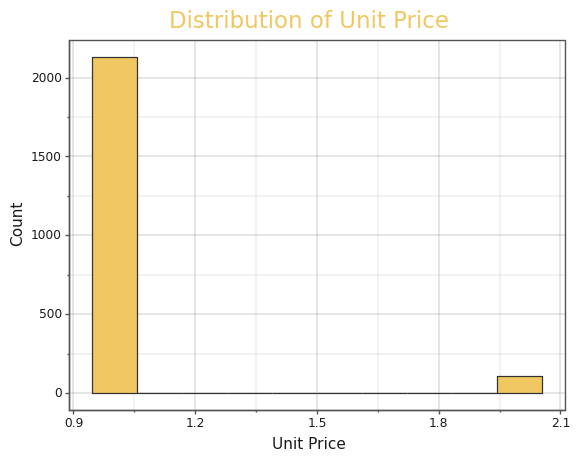

<ggplot: (8749301219065)>

In [10]:
plot_numeric_variable_distribution(invoice_lines_df, 'UnitPrice', bins = 10, 
                                   fill = '#F1C761', colour = '#333333')

There is almost zero variance in the 'UnitPrice' column. This won't be a useful column for customer segmentation.

#### Quantity

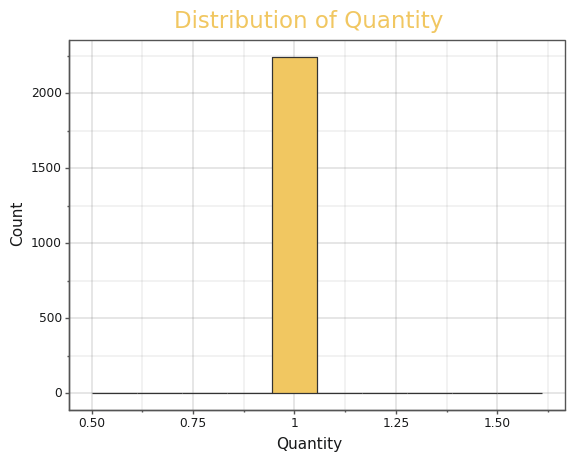

<ggplot: (8749300629209)>

In [11]:
plot_numeric_variable_distribution(invoice_lines_df, 'Quantity', bins = 10, 
                                   fill = '#F1C761', colour = '#333333')

There is zero variance in quantity. This won't be a useful column for customer segmentation.

#### Milliseconds

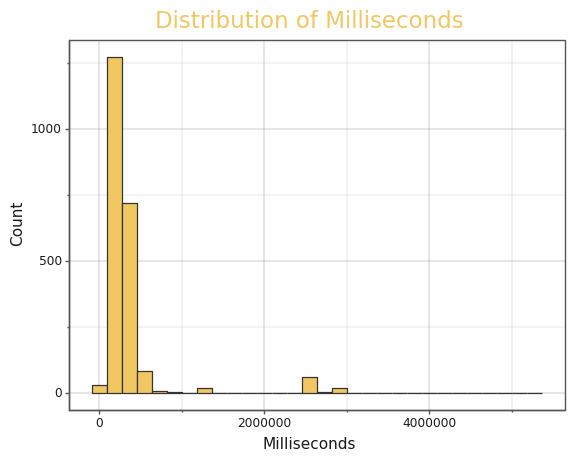

<ggplot: (8749348680921)>

In [12]:
plot_numeric_variable_distribution(invoice_lines_df, 'Milliseconds', bins = 30, 
                                   fill = '#F1C761', colour = '#333333')

It's difficult to see the distribution because it's so skewed. Let's try again with the log10 of the distribution.

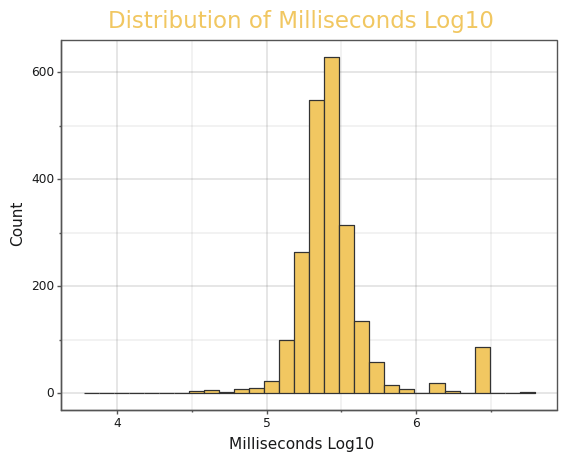

<ggplot: (8749301172797)>

In [13]:
plot_numeric_variable_distribution(invoice_lines_df, 'Milliseconds', log10 = True, bins = 30, 
                                   fill = '#F1C761', colour = '#333333')

This may be a useful column. It'll be interesting to see if the customers can be segmented by duration of the songs they've purchased.

#### Bytes

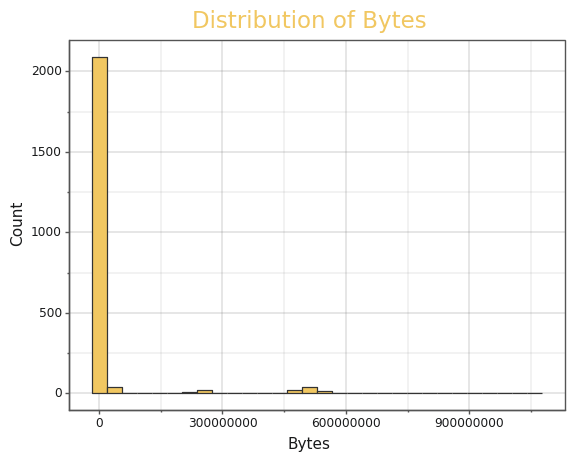

<ggplot: (8749300574117)>

In [14]:
plot_numeric_variable_distribution(invoice_lines_df, 'Bytes', bins = 30, 
                                   fill = '#F1C761', colour = '#333333')

Again the column is too skewed to see the distribution.

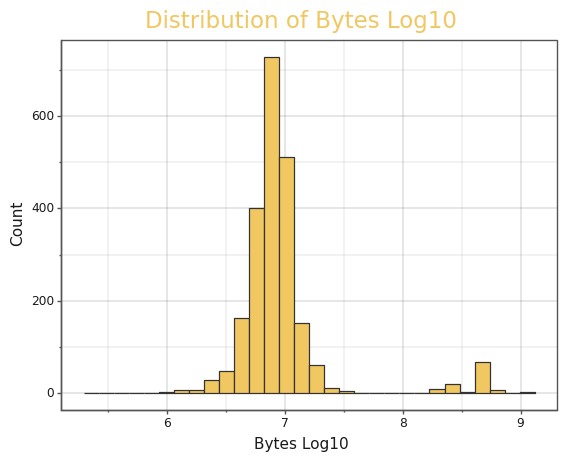

<ggplot: (8749300536433)>

In [15]:
plot_numeric_variable_distribution(invoice_lines_df, 'Bytes', log10 = True, bins = 30, 
                                   fill = '#F1C761', colour = '#333333')

Is this column redundant? It's easy to imagine that the duration of a track and it's size is highly correlated. Let's find out.

In [16]:
np.corrcoef(invoice_lines_df['Milliseconds'], invoice_lines_df['Bytes'])

array([[1.        , 0.96624438],
       [0.96624438, 1.        ]])

The correlation is very high, almost 1, meaning there's little point in using both these columns to segment customers as the information captured in one column is going to be approximately the same as the information captured in the other.

### Categorical Columns

The problem we face here is that there are so many unique categories across the categorical columns that there is no good way to visualize the distributions.

What I'm going to do instead is count the occurance of each unique observation for each column and use summary statistics about these counts to see if the column will be useful for customer segmentation.

#### Track Name

In [17]:
invoice_lines_df.value_counts('TrackName').describe()

count    1888.000000
mean        1.186441
std         0.440632
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         5.000000
dtype: float64

In this cross-section of data there are 1888 unique tracks, the average count is very close to one. There's no use in trying mine customer segments with such disparate data. This won't be a useful column for customer segmentation.

#### Composer

In [18]:
invoice_lines_df.value_counts('Composer').describe()

count    572.000000
mean       2.874126
std        4.212178
min        1.000000
25%        1.000000
50%        1.000000
75%        3.000000
max       58.000000
dtype: float64

This column is a little better. There are 572 unique composers, the average count is around three but the median is still one. It will still be difficult to mine customer segments with such disparate data. This won't be a useful column for customer segmentation. There's no need to further explore this columns missing data.

#### Genre Name

In [19]:
invoice_lines_df.value_counts('GenreName').describe()

count     24.000000
mean      93.333333
std      184.958671
min        6.000000
25%       12.750000
50%       24.000000
75%       50.500000
max      835.000000
dtype: float64

There are 24 unique genres. The average count for each genre is 93 and the median is 24, there's one genre that shows up 835 times. This column may be very useful in customer segmentation.

#### Album Title

In [20]:
invoice_lines_df.value_counts('AlbumTitle').describe()

count    304.000000
mean       7.368421
std        4.728516
min        1.000000
25%        4.000000
50%        7.000000
75%       10.000000
max       27.000000
dtype: float64

There are 304 unique albums, with an average and median count of 7. Again the variance, while not as bad as the 'TrackName' and 'Composer' columns, will make it difficult to mine for customer trends.

#### Artist Name

In [21]:
invoice_lines_df.value_counts('ArtistName').describe()

count    165.000000
mean      13.575758
std       18.306387
min        1.000000
25%        4.000000
50%        8.000000
75%       17.000000
max      140.000000
dtype: float64

There are 135 unique artists, with an average count of 13 and a median of 8, there is one artist that shows up 140 times. This column may be useful for customer segmentation.

## Visualizing the Relationship Between Customer Id and Milliseconds

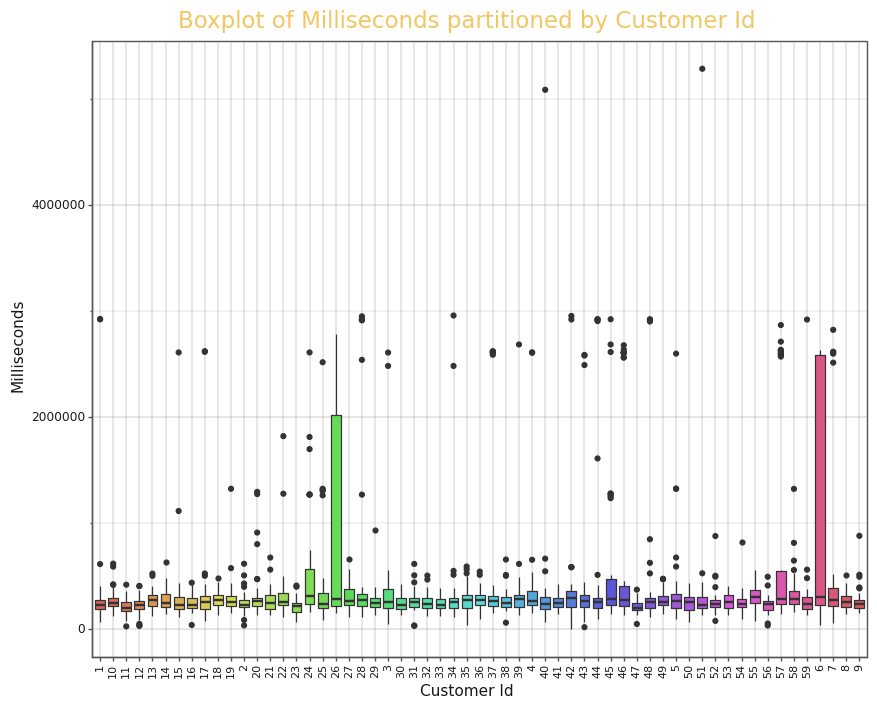

<ggplot: (8749300395069)>

In [22]:
ggplot(data=invoice_lines_df \
    .assign(CustomerId = lambda x: x['CustomerId'].astype(str))) + \
    geom_boxplot(aes(x = 'CustomerId', y = 'Milliseconds', fill = 'CustomerId')) + \
    scale_fill_discrete(guide = False) + \
    theme_msand() + \
    theme(axis_text_x=element_text(size=8, rotation=90),
          figure_size=(10, 8)) + \
    labs(
        title = 'Boxplot of Milliseconds partitioned by Customer Id',
        x = 'Customer Id'
    )

The skewed data makes the distributions harder to see. Transforming the 'Milliseconds' column using log10 and sorting the x-axis by the customer's median milliseconds will make the plot easier to read. I'll also add a reference line that represents the overall median to the plot. This will make it easier to see deviations from what would be a "normal" median duration.

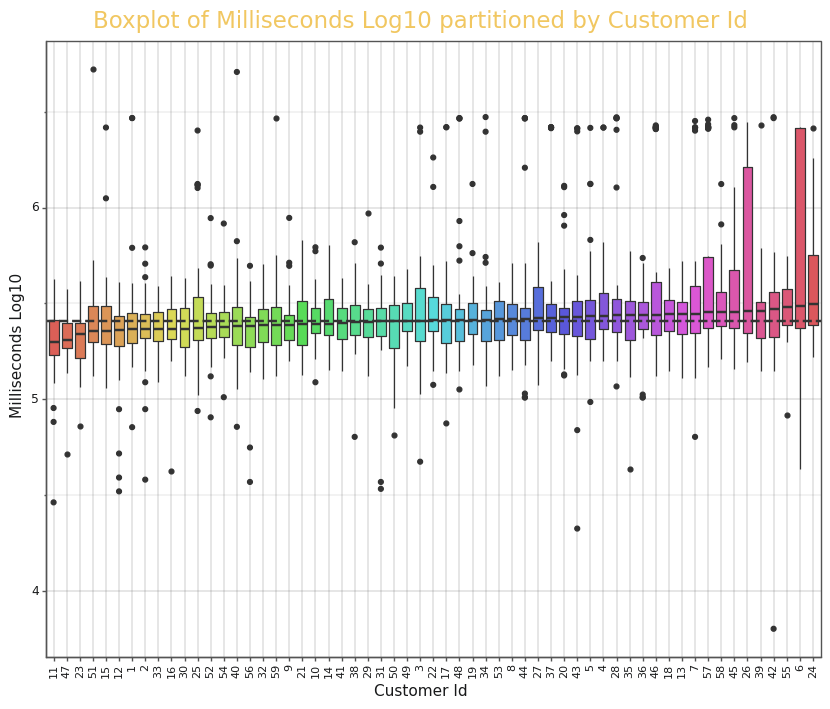

<ggplot: (8749299785105)>

In [23]:
median_index = pd.concat(
    [invoice_lines_df[['CustomerId', 'Milliseconds']] \
        .groupby('CustomerId') \
        .transform(np.median) \
        .rename(columns = dict(Milliseconds = 'Median')),
    invoice_lines_df[['CustomerId', 'Milliseconds']]],
    axis=1
) \
    .sort_values('Median') \
    .CustomerId.unique().tolist()

# We need to convert the 'CustomerId' column to categorical and give our median_index as it's levels.
invoice_lines_df['CustomerId'] = pd.Categorical(invoice_lines_df['CustomerId'], categories=median_index)

# Transform the y-axis using log10 to more easily see trend
invoice_lines_df['MillisecondsLog10'] = np.log10(invoice_lines_df['Milliseconds'])

# Overall Median for our reference line
overall_median = np.median(invoice_lines_df['MillisecondsLog10'])

ggplot(data=invoice_lines_df) + \
    geom_boxplot(aes(x = 'CustomerId', y = 'MillisecondsLog10', fill = 'CustomerId')) + \
    geom_hline(aes(yintercept = overall_median), size = 1, color = '#333333', linetype = 'dashed') + \
    scale_fill_discrete(guide = False) + \
    theme_msand() + \
    theme(axis_text_x=element_text(size=8, rotation=90),
          figure_size=(10, 8)) + \
    labs(
        title = 'Boxplot of Milliseconds Log10 partitioned by Customer Id',
        x = 'Customer Id',
        y = 'Milliseconds Log10'
    )

There isn't a great deal of deviation from the baseline median. Clustering the customers according to their median duration may not reveal all that much. There is a great deal of outliers for each customer. Perhaps different quantiles will yield better clustering results?